In [1]:
pip install tensorflow-datasets

In [2]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.R12C3V_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
import io
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from google.colab import files


In [29]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
class_names=['truck','frog','cat','ship','dog','deer','cat','bird','automobile','airplane']


In [8]:
modell = models.Sequential([layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),

                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64,(3,3),activation='relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(10,activation='softmax')

                                          ])
modell.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
historyy=modell.fit(train_images,train_labels,epochs=11,validation_split=0.2,verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
1250/1250 - 56s - 45ms/step - accuracy: 0.4690 - loss: 1.4755 - val_accuracy: 0.5468 - val_loss: 1.2785
Epoch 2/11
1250/1250 - 51s - 41ms/step - accuracy: 0.6057 - loss: 1.1164 - val_accuracy: 0.6245 - val_loss: 1.0762
Epoch 3/11
1250/1250 - 83s - 67ms/step - accuracy: 0.6545 - loss: 0.9853 - val_accuracy: 0.6549 - val_loss: 1.0071
Epoch 4/11
1250/1250 - 81s - 65ms/step - accuracy: 0.6882 - loss: 0.8944 - val_accuracy: 0.6693 - val_loss: 0.9566
Epoch 5/11
1250/1250 - 84s - 67ms/step - accuracy: 0.7118 - loss: 0.8263 - val_accuracy: 0.6790 - val_loss: 0.9424
Epoch 6/11
1250/1250 - 80s - 64ms/step - accuracy: 0.7362 - loss: 0.7570 - val_accuracy: 0.6819 - val_loss: 0.9469
Epoch 7/11
1250/1250 - 52s - 41ms/step - accuracy: 0.7548 - loss: 0.7023 - val_accuracy: 0.6822 - val_loss: 0.9311
Epoch 8/11
1250/1250 - 83s - 66ms/step - accuracy: 0.7727 - loss: 0.6535 - val_accuracy: 0.6857 - val_loss: 0.9511
Epoch 9/11
1250/1250 - 83s - 67ms/step - accuracy: 0.7898 - loss: 0.6061 - val_a

In [31]:
def preprocessing_images(image):
    image = image.resize((32, 32))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def predict_images(image):
    image = preprocessing_images(image)
    prediction = modell.predict(image)
    predicted_class = class_names[np.argmax(prediction[0])]
    return predicted_class

uploaded = files.upload()

for image_name in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[image_name]))
    predicted_class = predict_images(image)
    print(f"The predicted class for {image_name} is {predicted_class}")


Saving IMG-20240825-WA0011.jpg to IMG-20240825-WA0011 (10).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted class for IMG-20240825-WA0011 (10).jpg is cat


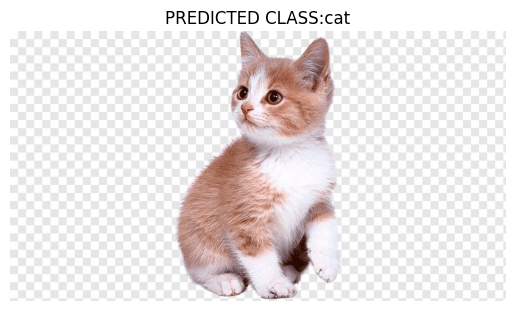

PREDICTED CLASS:cat


In [32]:
plt.imshow(image)
plt.title(f'PREDICTED CLASS:{predicted_class}')
plt.axis('off')
plt.show()
print(f"PREDICTED CLASS:{predicted_class}")